In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/loan_data (8).csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df['person_education'].replace(['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate'],[1,2,3,4,5],inplace=True)

/tmp/ipython-input-3494257205.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_education'].replace(['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate'],[1,2,3,4,5],inplace=True)
/tmp/ipython-input-3494257205.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['person_educ

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['person_gender']=le.fit_transform(df['person_gender'])
df['person_home_ownership']=le.fit_transform(df['person_home_ownership'])
df['loan_intent']=le.fit_transform(df['loan_intent'])
df['previous_loan_defaults_on_file']=le.fit_transform(df['previous_loan_defaults_on_file'])

In [8]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,1,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,1,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,3,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,2,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0,1
44996,37.0,0,2,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0,1
44997,33.0,1,2,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0,1
44998,29.0,1,3,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0,1


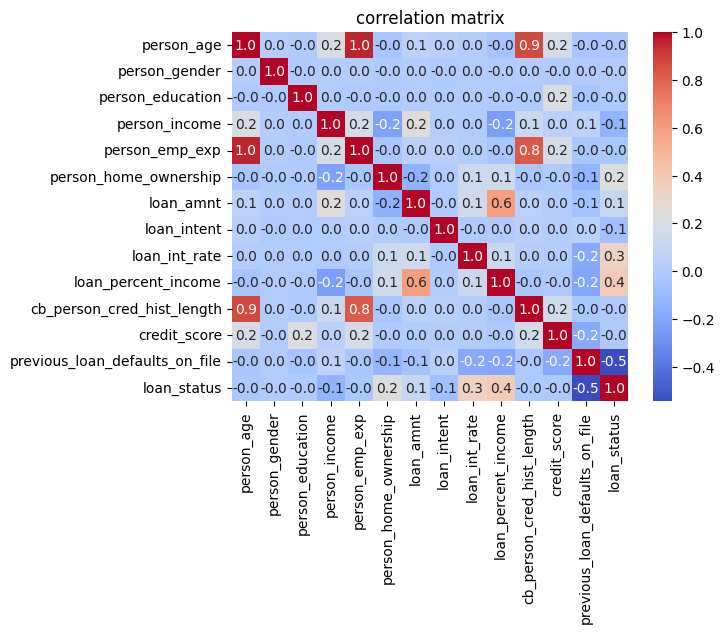

In [9]:
corr_matrix=df.corr()

sns.heatmap(corr_matrix,annot=True,fmt='0.01f',cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

In [10]:
df.drop(['cb_person_cred_hist_length','person_emp_exp'],axis=1,inplace=True)

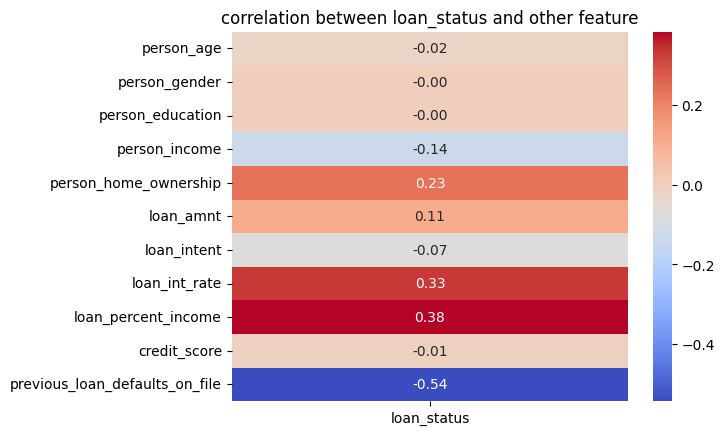

In [11]:
loan_status_corr=df.corr()['loan_status']

loan_status_corr=loan_status_corr.drop('loan_status')

sns.heatmap(loan_status_corr.to_frame(),annot=True,fmt='0.2f',cmap='coolwarm',annot_kws={'size':10})
plt.title('correlation between loan_status and other feature')
plt.show()

In [12]:
df.drop(['person_age','person_gender','person_education','loan_intent','credit_score'],axis=1,inplace=True)

<Axes: >

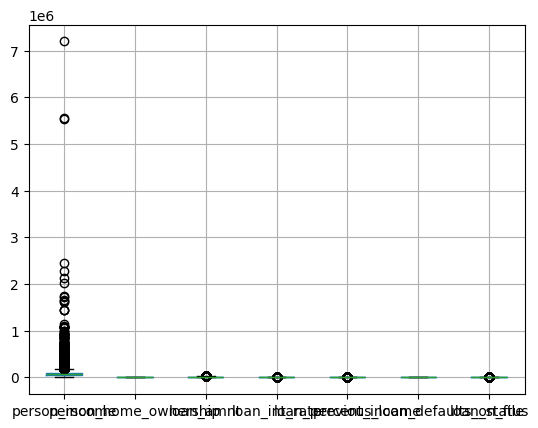

In [13]:
df.boxplot()

In [14]:
def remove_outlier(df,exclude_column):
  for col in df.columns:
    if col==exclude_column:
      continue

      Q1=df[col].quantile(0.25)
      Q3=df[col].quantile(0.75)
      IQR=Q3-Q1
      lower_bound= Q1-1.5*IQR
      upper_bound= Q3+1.5*IQR

      df=df[(df[col]>= lower_bound)&(df[col]<= upper_bound)]
  return df

df_cleaned=remove_outlier(df,exclude_column='loan_status')
df=df_cleaned

In [15]:
df

,person_income,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status
0,71948.0,3,35000.0,16.02,0.49,0,1
1,12282.0,2,1000.0,11.14,0.08,1,0
2,12438.0,0,5500.0,12.87,0.44,0,1
3,79753.0,3,35000.0,15.23,0.44,0,1
4,66135.0,3,35000.0,14.27,0.53,0,1
...,...,...,...,...,...,...,...
44995,47971.0,3,15000.0,15.66,0.31,0,1
44996,65800.0,3,9000.0,14.07,0.14,0,1
44997,56942.0,3,2771.0,10.02,0.05,0,1
44998,33164.0,3,12000.0,13.23,0.36,0,1


In [16]:
from sklearn.preprocessing import MinMaxScaler

features=['person_income','person_home_ownership','loan_amnt','loan_int_rate','loan_percent_income','previous_loan_defaults_on_file']

scaler=MinMaxScaler()

scaled=scaler.fit_transform(df[features])

scaled_df=pd.DataFrame(scaled,columns=features)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

x=df.drop('loan_status',axis=1)
y=df['loan_status']

kf= KFold(n_splits=5, shuffle=True, random_state=42)

model=LogisticRegression()

best_accuracy = 0
best_fold = -1

best_x_train = None
best_y_train = None
best_x_test = None
best_y_test = None
best_y_pred = None


for fold, (train_index,test_index) in enumerate(kf.split(x),1):
  x_train,x_test = x.iloc[train_index],x.iloc[test_index]
  y_train,y_test = y.iloc[train_index],y.iloc[test_index]

  model.fit(x_train,y_train)

  y_pred = model.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  print(f'Fold {fold} accuracy:{acc}')

  if acc > best_accuracy:
        best_accuracy = acc
        best_fold = fold
        best_x_train = x_train
        best_y_train = y_train
        best_x_test = x_test
        best_y_test = y_test
        best_y_pred = y_pred

print(f"\n Best Fold: {best_fold} with Accuracy: {best_accuracy}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 1 accuracy:0.8722222222222222


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 2 accuracy:0.8763333333333333


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 3 accuracy:0.8747777777777778


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 4 accuracy:0.8761111111111111
Fold 5 accuracy:0.8738888888888889

 Best Fold: 2 with Accuracy: 0.8763333333333333


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
model = LogisticRegression()
model.fit(best_x_train,best_y_train)
model.score(best_x_test,best_y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8763333333333333

In [19]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model.fit(best_x_train,best_y_train)
model.score(best_x_test,best_y_test)

0.8958888888888888

In [20]:
from sklearn.svm import SVC
model=SVC()
model.fit(best_x_train,best_y_train)
model.score(best_x_test,best_y_test)

0.8073333333333333

In [21]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(best_x_train,best_y_train)
model.score(best_x_test,best_y_test)

0.9258888888888889